# CIFAR-10 V.3
## features scaling
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them

### required modules

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, optimizers

### constants

In [2]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32
BATCH_SIZE = 64
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()


### load the dataset

In [3]:
(X_train, Y_train), (X_test,Y_test) = datasets.cifar10.load_data()

print("X_train: " + str(X_train.shape))
print("Y_train: " + str(Y_train.shape))
print("X_test: " + str(X_test.shape))
print("Y_test: " + str(Y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test: (10000, 32, 32, 3)
Y_test: (10000, 1)


### normalize the datasets

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

mean = np.mean(X_train, axis=(0,1,2,3))
std = np.std(X_train, axis=(0,1,2,3))

X_train = (X_train-mean/(std+1e-7))
X_test = (X_test-mean/(std+1e-7))


### one-hot representation of the labels

In [5]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

### display some images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

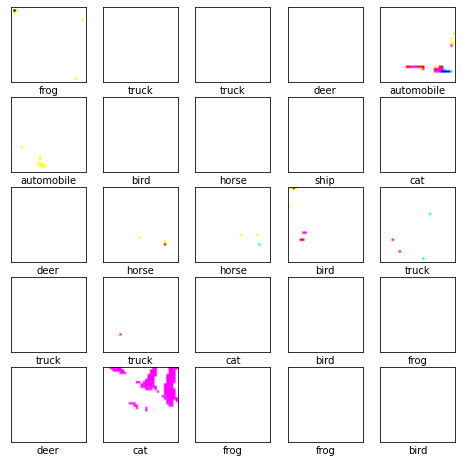

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train[i])])
plt.show()

### define the convnet

In [7]:
def build(input_shape, classes):
    model = models.Sequential()

    #1st block    
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))    
    model.add(layers.Dropout(0.2))

    #2nd block    
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))    
    model.add(layers.Dropout(0.3))

    #3d block    
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(pool_size=(2,2)))    
    model.add(layers.Dropout(0.4))

    #dense
    model.add(layers.Flatten())
    model.add(layers.Dense(classes, activation='softmax'))
    
    return model


### build the model

In [8]:
model = build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

### train the model

In [9]:
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs/cifar10/scalars/v3')]

model.compile(
    loss='categorical_crossentropy', 
    optimizer=OPTIM, 
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks=callbacks,
    verbose=VERBOSE
)






Epoch 1/20
625/625 [==============================] - 432s 691ms/step - loss: 1.7410 - accuracy: 0.4566 - val_loss: 1.2559 - val_accuracy: 0.5704
Epoch 2/20
625/625 [==============================] - 397s 636ms/step - loss: 1.1067 - accuracy: 0.6291 - val_loss: 1.0400 - val_accuracy: 0.6351
Epoch 3/20
625/625 [==============================] - 382s 611ms/step - loss: 0.8611 - accuracy: 0.6995 - val_loss: 0.8428 - val_accuracy: 0.7067
Epoch 4/20
625/625 [==============================] - 365s 584ms/step - loss: 0.7410 - accuracy: 0.7416 - val_loss: 0.8690 - val_accuracy: 0.7034
Epoch 5/20
625/625 [==============================] - 340s 543ms/step - loss: 0.6691 - accuracy: 0.7677 - val_loss: 0.7209 - val_accuracy: 0.7470
Epoch 6/20
625/625 [==============================] - 340s 543ms/step - loss: 0.6132 - accuracy: 0.7875 - val_loss: 0.6558 - val_accuracy: 0.7726
Epoch 7/20
625/625 [==============================] - 463s 741ms/step - loss: 0.5741 - accuracy: 0.8019 - val_loss: 0.6650 -

### create the history dataframe

In [10]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
15,0.363923,0.871375,0.496745,0.8369,15
16,0.350681,0.876075,0.597976,0.8076,16
17,0.340775,0.878575,0.507488,0.8327,17
18,0.332424,0.884050,0.532762,0.8230,18
19,0.323628,0.886275,0.522027,0.8292,19


### plot

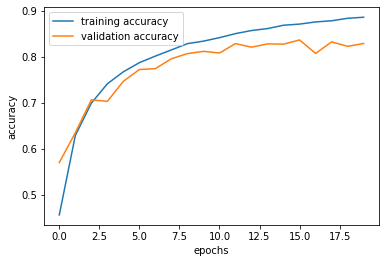

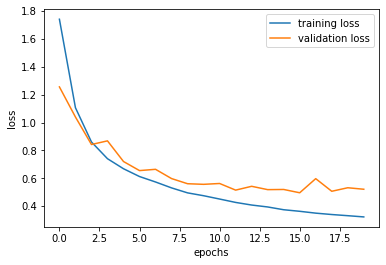

In [11]:
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### evaluate the model

In [12]:
score = model.evaluate(
    X_test, Y_test, 
    batch_size=BATCH_SIZE, 
    verbose=VERBOSE
)

print("Test score: ", score[0])
print("Test accuracy: ", score[1])

157/157 [==============================] - 21s 131ms/step - loss: 0.5414 - accuracy: 0.8242
Test score:  0.5413883924484253
Test accuracy:  0.8241999745368958


### using tensorboard
tensorboard --host 0.0.0.0 --logdir logs/cifar10/scalars

